# DLProfile Example using mmaADSP Benchmark

## Set imports and neccessary environment variables

In [109]:
import pathlib
import os
import sys
import matplotlib.pyplot as plt
import warnings
import pprint
import pandas

In [110]:
VANIDL_DIR="{}".format(pathlib.Path(os.getcwd()).parent.parent.parent.absolute())
sys.path.insert(0, VANIDL_DIR)
warnings.filterwarnings('ignore')

In [111]:
os.environ["DARSHAN_DIR"] = "/soft/perftools/darshan/darshan-3.1.8"
os.environ["VANIDL_DIR"] = VANIDL_DIR

#### Formatting

In [112]:
pp = pprint.PrettyPrinter(indent=1)
class color:
    PURPLE = '\033[95m'
    CYAN = '\033[96m'
    DARKCYAN = '\033[36m'
    BLUE = '\033[94m'
    GREEN = '\033[92m'
    YELLOW = '\033[93m'
    RED = '\033[91m'
    BOLD = '\033[1m'
    UNDERLINE = '\033[4m'
    END = '\033[0m'

## Create instrance of DL Profile and load the darshan file

In [113]:
from src.vanidl import VaniDL
profile = VaniDL()

In [114]:
!rm /tmp/temp_analysis/cosmoflow_run3_p8*

rm: cannot remove ‘/tmp/temp_analysis/cosmoflow_run3_p8*’: No such file or directory


In [115]:

DATAPATH_INCLUDES = []
status = profile.Load("/home/dhari/darshan-logs/benchmark/cosmoflow/optimization/tc_32.darshan", data_paths_include=DATAPATH_INCLUDES)
if status:
    print("Darshan Trace loaded Successfully!")
else:
    print("Darshan Trace load Failed!")
    print(profile._error_str())

[============================================================] 100.0% 529314 of 529314 Parsing DXT File 
[============================================================] 100.0% 93983 of 93983 Parsing Darshan File 
Darshan Trace loaded Successfully!


## Use Profile object to analyze the darshan I/O trace.

### Verify if object works

The GetDXTAsDF() function enables users to perform analysis 

In [116]:
df = profile.GetDXTAsDF()
pp.pprint("Files used in the application")
pp.pprint(df['Filename'].nunique())
pp.pprint(sorted(df['Filename'].unique().tolist()))

'Files used in the application'
1016
['/projects/datascience/dhari/dlio_datasets/cosmoflow/img_0_of_1024.tfrecords',
 '/projects/datascience/dhari/dlio_datasets/cosmoflow/img_1000_of_1024.tfrecords',
 '/projects/datascience/dhari/dlio_datasets/cosmoflow/img_1001_of_1024.tfrecords',
 '/projects/datascience/dhari/dlio_datasets/cosmoflow/img_1002_of_1024.tfrecords',
 '/projects/datascience/dhari/dlio_datasets/cosmoflow/img_1003_of_1024.tfrecords',
 '/projects/datascience/dhari/dlio_datasets/cosmoflow/img_1004_of_1024.tfrecords',
 '/projects/datascience/dhari/dlio_datasets/cosmoflow/img_1005_of_1024.tfrecords',
 '/projects/datascience/dhari/dlio_datasets/cosmoflow/img_1006_of_1024.tfrecords',
 '/projects/datascience/dhari/dlio_datasets/cosmoflow/img_1007_of_1024.tfrecords',
 '/projects/datascience/dhari/dlio_datasets/cosmoflow/img_1008_of_1024.tfrecords',
 '/projects/datascience/dhari/dlio_datasets/cosmoflow/img_1009_of_1024.tfrecords',
 '/projects/datascience/dhari/dlio_datasets/cosmoflow

In [117]:
df_normal = profile.GetTraceAsDF()
pp.pprint("Files used in the application")
pp.pprint(df_normal['Filename'].nunique())
pp.pprint(sorted(df_normal['Filename'].unique().tolist()))

'Files used in the application'
1064
['/gpfs/mira-home/dhari/code/dlio_benchmark/scripts/logdir/plugins/profile/2020_07_31_17_41_37/nid03830.input_pipeline.pb',
 '/gpfs/mira-home/dhari/code/dlio_benchmark/scripts/logdir/plugins/profile/2020_07_31_17_41_37/nid03830.kernel_stats.pb',
 '/gpfs/mira-home/dhari/code/dlio_benchmark/scripts/logdir/plugins/profile/2020_07_31_17_41_37/nid03830.overview_page.pb',
 '/gpfs/mira-home/dhari/code/dlio_benchmark/scripts/logdir/plugins/profile/2020_07_31_17_41_37/nid03830.tensorflow_stats.pb',
 '/gpfs/mira-home/dhari/code/dlio_benchmark/scripts/logdir/plugins/profile/2020_07_31_17_41_37/nid03830.trace.json.gz',
 '/gpfs/mira-home/dhari/code/dlio_benchmark/scripts/logdir/plugins/profile/2020_07_31_17_41_37/nid03832.input_pipeline.pb',
 '/gpfs/mira-home/dhari/code/dlio_benchmark/scripts/logdir/plugins/profile/2020_07_31_17_41_37/nid03832.kernel_stats.pb',
 '/gpfs/mira-home/dhari/code/dlio_benchmark/scripts/logdir/plugins/profile/2020_07_31_17_41_37/nid0383

### Collect the summary of the Application

In [118]:
summary = profile.GetSummary()
print("\n")
print(color.BOLD + "Data Access Summary (from Darshan):"+ color.END)
print("Total Job time\t\t\t:\t{:0.2f} seconds".format(summary['job_time']))
#FIXME: calculate time per rank and then take max across it.
print("Time spent in I/O\t\t:\t{:0.2f} seconds".format(summary['total_io_time']/8))
print("% Time spent in I/O\t\t:\t{:0.2f}%".format(float(summary['total_io_time'])/8*100/summary['job_time']))
print("Total Data Accessed\t\t:\t{:0.2f} GB".format(float(summary['total_io_bytes'])/1024.0/1024.0/1024.0))
print("Data Access Modules used\t:\t{}".format(summary['io_interface_used']))
print("Data Operations\t\t\t:\t{}".format(summary['io_operations_used']))
print("# of files used\t\t\t:\t{}".format(len(summary['files_used'])))
print("# of MPI Ranks\t\t\t:\t{:0.0f} ranks".format(summary['num_ranks']))
      
print(color.UNDERLINE + "Data Transfer size:"+ color.END)
print("\tMin,Max\t\t\t:\t{:0.0f} bytes and {:0.0f} bytes".format(summary['data_transfer_size']['min'],summary['data_transfer_size']['max']))
print("\tAverage\t\t\t:\t{:0.0f} bytes".format(summary['data_transfer_size']['mean']))
print("\tMedian\t\t\t:\t{:0.0f} bytes".format(summary['data_transfer_size']['median']))
      
print(color.UNDERLINE + "Data Transfer bandwidth: (per rank)"+ color.END)
print("\tMin,Max\t\t\t:\t{:0.0f} B/s and {:0.0f} MB/s".format(summary['data_transfer_bandwidth']['min'],summary['data_transfer_bandwidth']['max']/1024.0/1024.0))
print("\tAverage\t\t\t:\t{:0.0f} MB/s".format(summary['data_transfer_bandwidth']['mean']/1024.0/1024.0))
print("\tMedian\t\t\t:\t{:0.0f} MB/s".format(summary['data_transfer_bandwidth']['median']/1024.0/1024.0))
      
print(color.UNDERLINE + "Access Pattern:"+ color.END)
print("\tSequential\t\t:\t{:0.2f}%".format(float(summary['access_pattern']['sequential'])))
print("\tConsecutive\t\t:\t{:0.2f}%".format(float(summary['access_pattern']['consecutive'])))
#An I/O op issued at an offset greater than where the previous I/O op ended.
#An I/O op issued at the offset immediately after the end of the previous I/O

print("\n")
print(color.BOLD + "Files Summary:"+ color.END)
print("File Types\t\t\t:\t{}".format(summary['file_used_summary']['types']))
print(color.UNDERLINE + "Dataset Size:"+ color.END)
print("\tTotal\t\t\t:\t{:0.1f} GB".format(32))
print("\tMin,Max\t\t\t:\t{:0.1f} GB and {:0.1f} GB".format(2,2))
print("\tAverage\t\t\t:\t{:0.1f} GB".format(2))



Data Access Summary (from Darshan):
Total Job time			:	147.00 seconds
Time spent in I/O		:	5.00 seconds
% Time spent in I/O		:	3.40%
Total Data Accessed		:	128.12 GB
Data Access Modules used	:	['X_POSIX']
Data Operations			:	['read']
# of files used			:	1016
# of MPI Ranks			:	8 ranks
Data Transfer size:
	Min,Max			:	0 bytes and 262144 bytes
	Average			:	260628 bytes
	Median			:	262144 bytes
Data Transfer bandwidth: (per rank)
	Min,Max			:	0 B/s and 2500 MB/s
	Average			:	1537 MB/s
	Median			:	1250 MB/s
Access Pattern:
	Sequential		:	99.81%
	Consecutive		:	99.81%


Files Summary:
File Types			:	['tfrecords']
Dataset Size:
	Total			:	32.0 GB
	Min,Max			:	2.0 GB and 2.0 GB
	Average			:	2.0 GB


In [119]:
pp.pprint("Job time : {} seconds".format(profile.GetJobTime()))

'Job time : 147.0 seconds'


In [120]:
pp.pprint("Time spent by application on I/O: {} seconds".format(profile.GetIOTime()/8))

'Time spent by application on I/O: 4.995443750005717 seconds'


### I/O time spent on each file

In [121]:
for file in df['Filename'].unique()[:16]:
    print("I/O time for file {}: {:0.2f} seconds".format(file,profile.GetIOTime(filepath=file)))

I/O time for file /projects/datascience/dhari/dlio_datasets/cosmoflow/img_55_of_1024.tfrecords: 0.31 seconds
I/O time for file /projects/datascience/dhari/dlio_datasets/cosmoflow/img_114_of_1024.tfrecords: 0.31 seconds
I/O time for file /projects/datascience/dhari/dlio_datasets/cosmoflow/img_946_of_1024.tfrecords: 0.30 seconds
I/O time for file /projects/datascience/dhari/dlio_datasets/cosmoflow/img_812_of_1024.tfrecords: 0.31 seconds
I/O time for file /projects/datascience/dhari/dlio_datasets/cosmoflow/img_32_of_1024.tfrecords: 0.31 seconds
I/O time for file /projects/datascience/dhari/dlio_datasets/cosmoflow/img_849_of_1024.tfrecords: 0.33 seconds
I/O time for file /projects/datascience/dhari/dlio_datasets/cosmoflow/img_518_of_1024.tfrecords: 0.31 seconds
I/O time for file /projects/datascience/dhari/dlio_datasets/cosmoflow/img_409_of_1024.tfrecords: 0.30 seconds
I/O time for file /projects/datascience/dhari/dlio_datasets/cosmoflow/img_26_of_1024.tfrecords: 0.31 seconds
I/O time for 

### I/O Time spent per rank

In [122]:
for rank in df['Rank'].unique()[:16]:
    print("I/O time for rank {}: {:0.2f} seconds".format(rank,profile.GetIOTime(rank=rank)))

I/O time for rank 0: 39.62 seconds
I/O time for rank 1: 39.76 seconds
I/O time for rank 2: 39.97 seconds
I/O time for rank 3: 40.17 seconds
I/O time for rank 4: 40.51 seconds
I/O time for rank 5: 39.82 seconds
I/O time for rank 6: 39.98 seconds
I/O time for rank 7: 39.88 seconds


In [123]:
"Total I/O performed by application: {:0.2f} GB".format(float(profile.GetIOSize())/1024.0/1024.0/1024.0)

'Total I/O performed by application: 128.12 GB'

### I/O performed on each file

In [124]:
for file in df['Filename'].unique()[:16]:
    print("I/O performed on file {}: {:0.2f} MB".format(file,float(profile.GetIOSize(filepath=file))/1024.0/1024.0))

I/O performed on file /projects/datascience/dhari/dlio_datasets/cosmoflow/img_55_of_1024.tfrecords: 128.00 MB
I/O performed on file /projects/datascience/dhari/dlio_datasets/cosmoflow/img_114_of_1024.tfrecords: 128.00 MB
I/O performed on file /projects/datascience/dhari/dlio_datasets/cosmoflow/img_946_of_1024.tfrecords: 128.00 MB
I/O performed on file /projects/datascience/dhari/dlio_datasets/cosmoflow/img_812_of_1024.tfrecords: 128.00 MB
I/O performed on file /projects/datascience/dhari/dlio_datasets/cosmoflow/img_32_of_1024.tfrecords: 128.00 MB
I/O performed on file /projects/datascience/dhari/dlio_datasets/cosmoflow/img_849_of_1024.tfrecords: 128.00 MB
I/O performed on file /projects/datascience/dhari/dlio_datasets/cosmoflow/img_518_of_1024.tfrecords: 128.00 MB
I/O performed on file /projects/datascience/dhari/dlio_datasets/cosmoflow/img_409_of_1024.tfrecords: 128.00 MB
I/O performed on file /projects/datascience/dhari/dlio_datasets/cosmoflow/img_26_of_1024.tfrecords: 128.00 MB
I/O 

In [125]:
for rank in df['Rank'].unique()[:16]:
    print("I/O performed by rank {}: {:0.2f} MB".format(rank, float(profile.GetIOSize(rank=rank))/1024.0/1024.0))

I/O performed by rank 0: 16218.18 MB
I/O performed by rank 1: 16218.18 MB
I/O performed by rank 2: 16218.18 MB
I/O performed by rank 3: 16218.18 MB
I/O performed by rank 4: 16218.18 MB
I/O performed by rank 5: 16218.18 MB
I/O performed by rank 6: 16218.18 MB
I/O performed by rank 7: 16218.18 MB


In [126]:
print("Size of dataset (bytes)")
pp.pprint(profile.GetFileSizes())

Size of dataset (bytes)
{'img_0_of_1024': 134219264.0,
 'img_1000_of_1024': 134219264.0,
 'img_1001_of_1024': 134219264.0,
 'img_1002_of_1024': 134219264.0,
 'img_1003_of_1024': 134219264.0,
 'img_1004_of_1024': 134219264.0,
 'img_1005_of_1024': 134219264.0,
 'img_1006_of_1024': 134219264.0,
 'img_1007_of_1024': 134219264.0,
 'img_1008_of_1024': 134219264.0,
 'img_1009_of_1024': 134219264.0,
 'img_100_of_1024': 134219264.0,
 'img_1010_of_1024': 134219264.0,
 'img_1011_of_1024': 134219264.0,
 'img_1012_of_1024': 134219264.0,
 'img_1013_of_1024': 134219264.0,
 'img_1014_of_1024': 134219264.0,
 'img_1015_of_1024': 134219264.0,
 'img_1016_of_1024': 134219264.0,
 'img_1017_of_1024': 134219264.0,
 'img_1018_of_1024': 134219264.0,
 'img_1019_of_1024': 134219264.0,
 'img_101_of_1024': 134219264.0,
 'img_1020_of_1024': 134219264.0,
 'img_1021_of_1024': 134219264.0,
 'img_1022_of_1024': 134219264.0,
 'img_1023_of_1024': 134219264.0,
 'img_102_of_1024': 134219264.0,
 'img_103_of_1024': 134219264.

 'img_9_of_1024': 134219264.0,
 'nid03830.input_pipeline': 16725.0,
 'nid03830.kernel_stats': 0.0,
 'nid03830.overview_page': 17668.0,
 'nid03830.tensorflow_stats': 41595.0,
 'nid03830.trace.json': 15531568.0,
 'nid03832.input_pipeline': 16725.0,
 'nid03832.kernel_stats': 0.0,
 'nid03832.overview_page': 17668.0,
 'nid03832.tensorflow_stats': 41595.0,
 'nid03832.trace.json': 15333643.0,
 'nid03833.input_pipeline': 16716.0,
 'nid03833.kernel_stats': 0.0,
 'nid03833.overview_page': 17659.0,
 'nid03833.tensorflow_stats': 41595.0,
 'nid03833.trace.json': 15551995.0,
 'nid03834.input_pipeline': 16725.0,
 'nid03834.kernel_stats': 0.0,
 'nid03834.overview_page': 17668.0,
 'nid03834.tensorflow_stats': 41595.0,
 'nid03834.trace.json': 15515701.0,
 'nid03835.input_pipeline': 16716.0,
 'nid03835.kernel_stats': 0.0,
 'nid03835.overview_page': 17659.0,
 'nid03835.tensorflow_stats': 41595.0,
 'nid03835.trace.json': 15510770.0,
 'nid03836.input_pipeline': 16716.0,
 'nid03836.kernel_stats': 0.0,
 'nid0

In [127]:
file="/lus/theta-fs0/projects/MLPerfHPC/cosmoflow/dataset/cosmoUniverse_2019_02_4parE/dim128_cube_nT4/cosmoUniverse_2019_02_4parE-dim128_cube_nT4-rec1003.tfrecords"
!ls -l $file

-rw-r----- 1 memani MLPerfHPC 2147490944 Feb 12  2019 /lus/theta-fs0/projects/MLPerfHPC/cosmoflow/dataset/cosmoUniverse_2019_02_4parE/dim128_cube_nT4/cosmoUniverse_2019_02_4parE-dim128_cube_nT4-rec1003.tfrecords


### How application access data over time.

[============================================================] 100.0% 522000 of 522000 Creating Timeline 


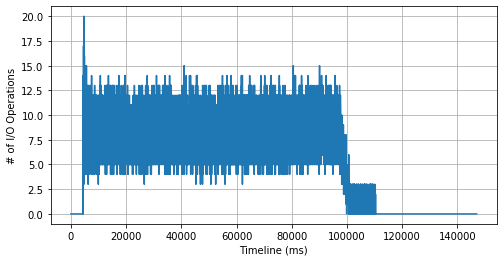

In [128]:
tl = profile.CreateIOTimeline(time_step=0.001)
plt.figure(figsize=(8,4))
plt.xlabel("Timeline (ms)")
plt.ylabel("# of I/O Operations")
plt.grid()
plt.plot(tl['time_step'], tl['operation_count']);

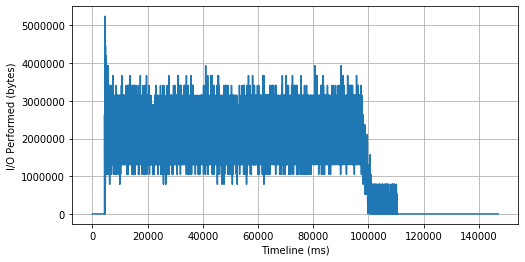

In [129]:
plt.figure(figsize=(8,4))
plt.xlabel("Timeline (ms)")
plt.ylabel("I/O Performed (bytes)")
plt.grid()
plt.plot(tl['time_step'], tl['io_bytes']);

### How files are accessed over the duration of the Job.

[============================================================] 100.0% 515 of 515 Creating Timeline 


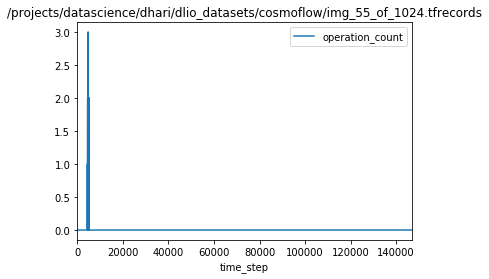

[============================================================] 100.0% 515 of 515 Creating Timeline 


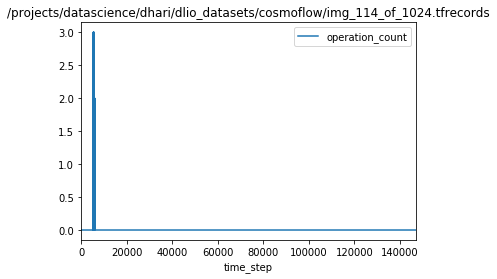

[============================================================] 100.0% 515 of 515 Creating Timeline 


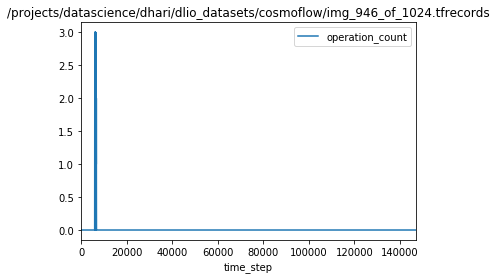

[============================================================] 100.0% 515 of 515 Creating Timeline 


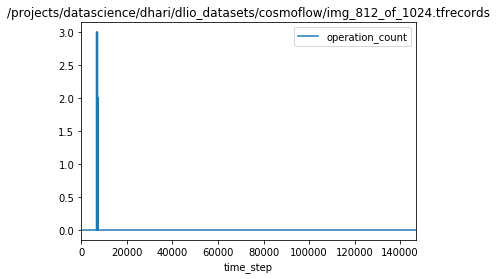

[============================================================] 100.0% 515 of 515 Creating Timeline 


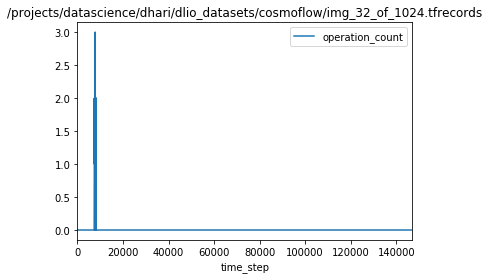

[============================================================] 100.0% 515 of 515 Creating Timeline 


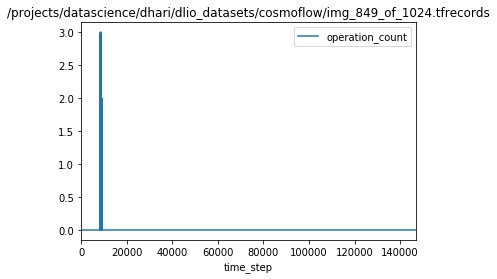

[============================================================] 100.0% 515 of 515 Creating Timeline 


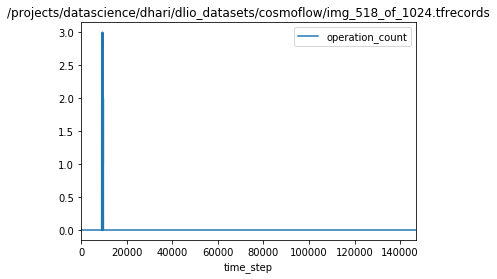

[============================================================] 100.0% 515 of 515 Creating Timeline 


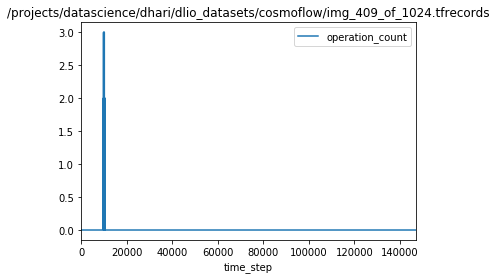

[============================================================] 100.0% 515 of 515 Creating Timeline 


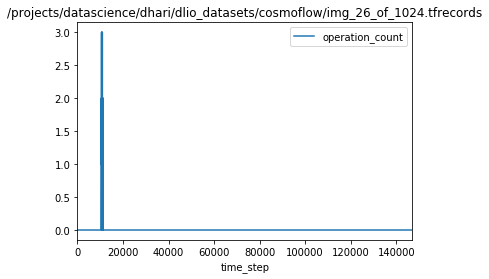

[============================================================] 100.0% 515 of 515 Creating Timeline 


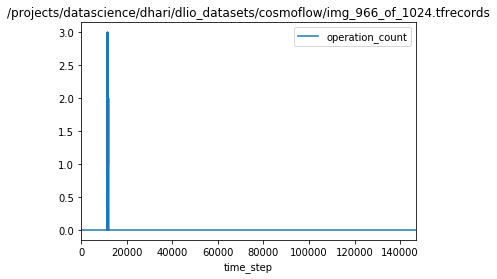

[============================================================] 100.0% 515 of 515 Creating Timeline 


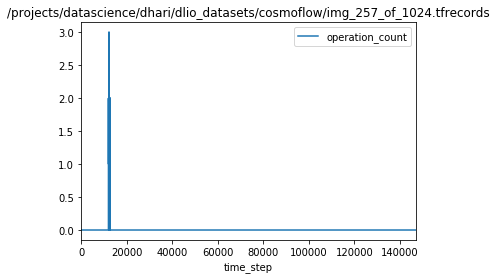

[============================================================] 100.0% 515 of 515 Creating Timeline 


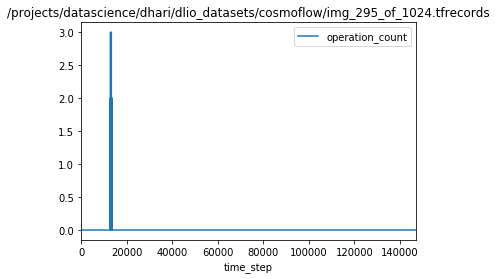

[============================================================] 100.0% 515 of 515 Creating Timeline 


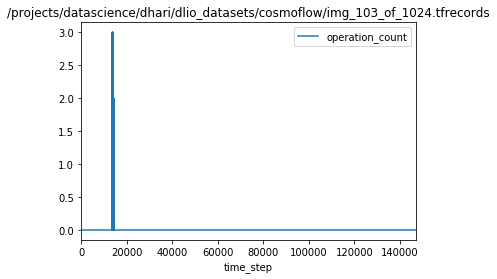

[============================================================] 100.0% 515 of 515 Creating Timeline 


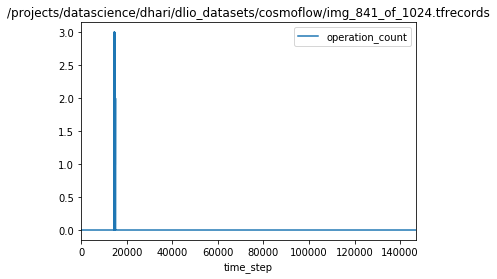

[============================================================] 100.0% 515 of 515 Creating Timeline 


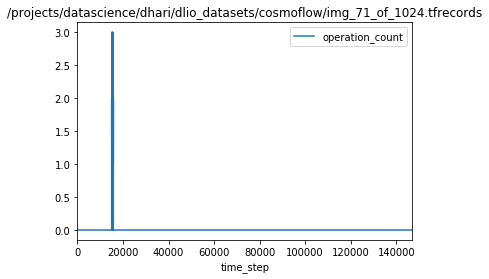

[============================================================] 100.0% 515 of 515 Creating Timeline 


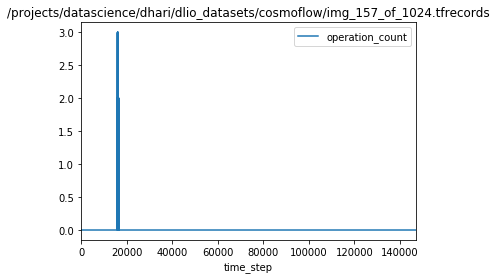

In [130]:
for file in df['Filename'].unique()[:16]:
    tl = profile.CreateIOTimeline(filepath=file,time_step=0.001)
    tl.plot(x='time_step',y='operation_count', title=file)
    plt.show()

### Show how each file is accessed by each rank.

[============================================================] 100.0% 65250 of 65250 Creating Timeline 


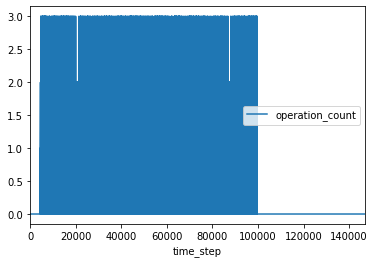

[============================================================] 100.0% 65250 of 65250 Creating Timeline 


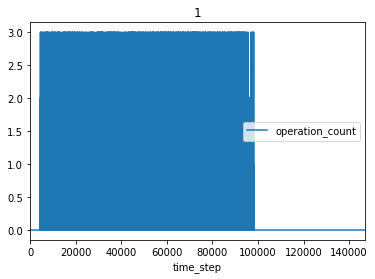

[============================================================] 100.0% 65250 of 65250 Creating Timeline 


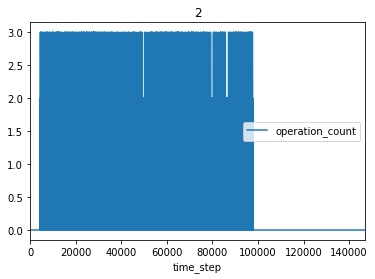

[============================================================] 100.0% 65250 of 65250 Creating Timeline 


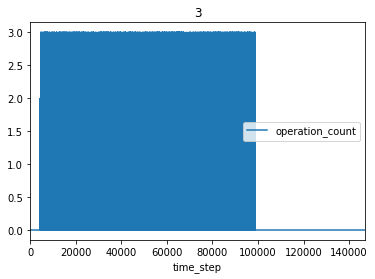

[============================================================] 100.0% 65250 of 65250 Creating Timeline 


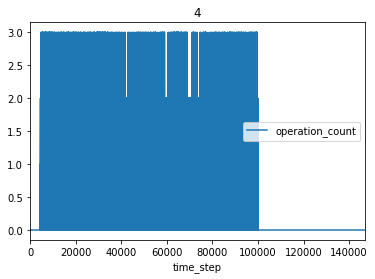

[============================================================] 100.0% 65250 of 65250 Creating Timeline 


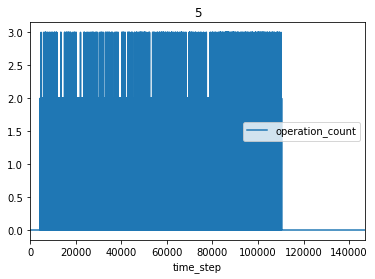

[============================================================] 100.0% 65250 of 65250 Creating Timeline 


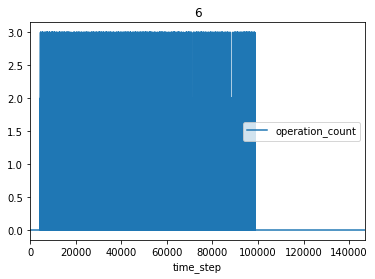

[============================================================] 100.0% 65250 of 65250 Creating Timeline 


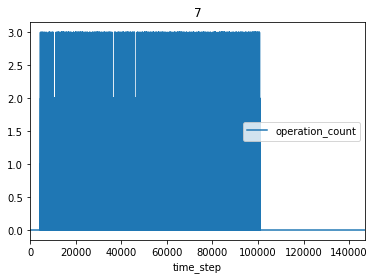

In [131]:
for rank in df['Rank'].unique()[:16]:
    tl = profile.CreateIOTimeline(rank=rank, time_step = 0.001)
    tl.plot(x='time_step',y='operation_count', title=rank)
    plt.show()

### Data Transfer Size distribution within the application

Text(0.5, 0, 'Transfer Size (bytes)')

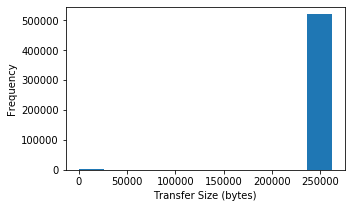

In [132]:
request_df = profile.GetIORequestDistribution()
df['Length'].plot(kind='hist', figsize=(5, 3));
plt.xlabel("Transfer Size (bytes)")

### Data Transfer Size distribution for each file.

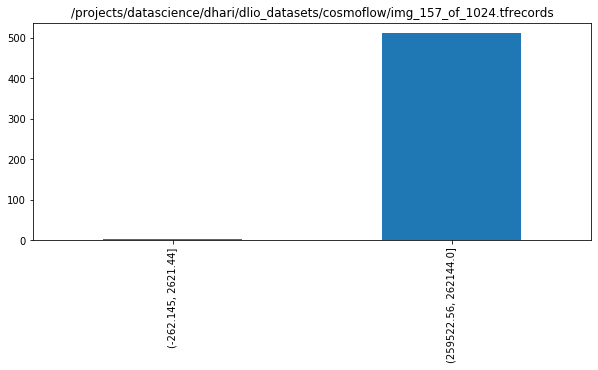

In [133]:
for file in df['Filename'].unique()[:16]:
    tl = profile.GetIORequestDistribution(filepath=file)
    tl.plot(kind='bar', figsize=(10, 4), title=file)

### Data Transfer Sizes per Rank

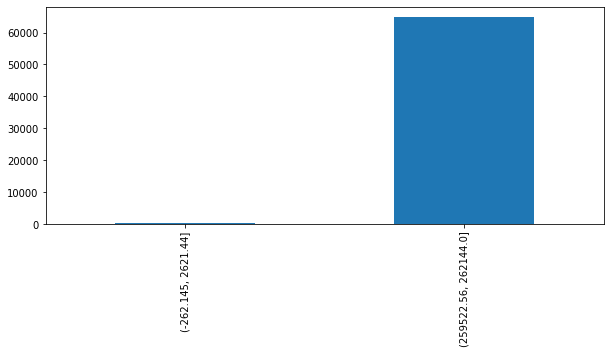

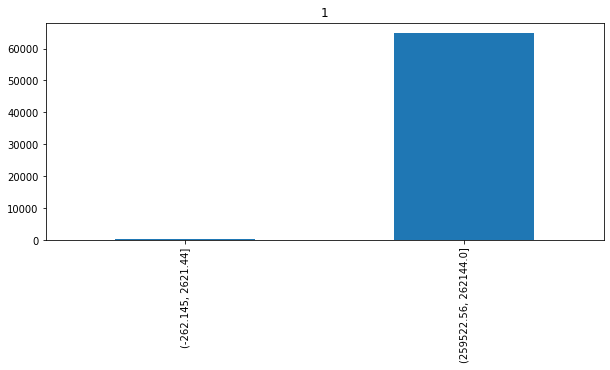

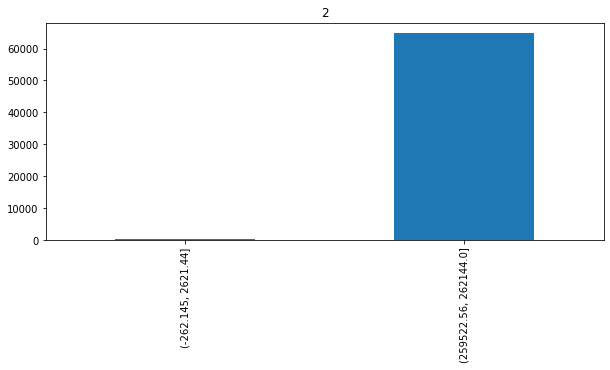

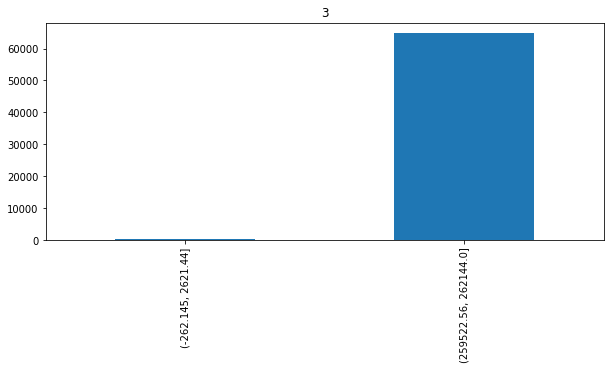

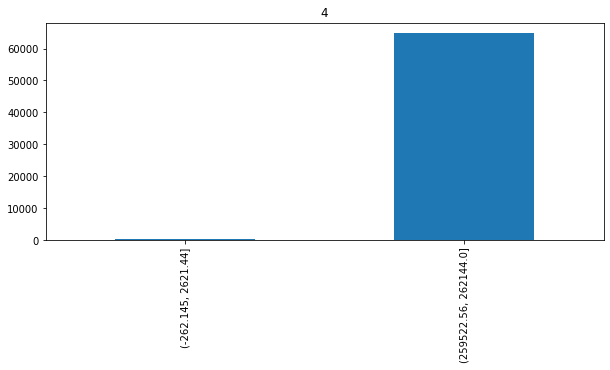

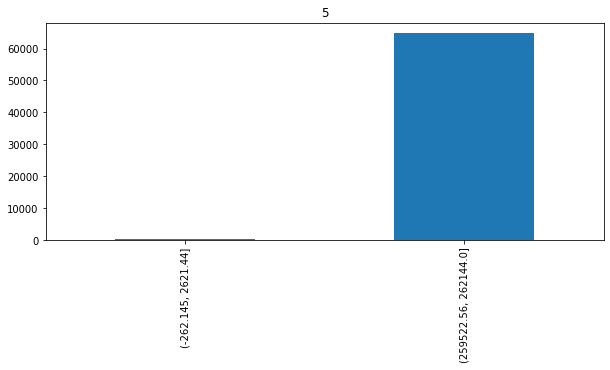

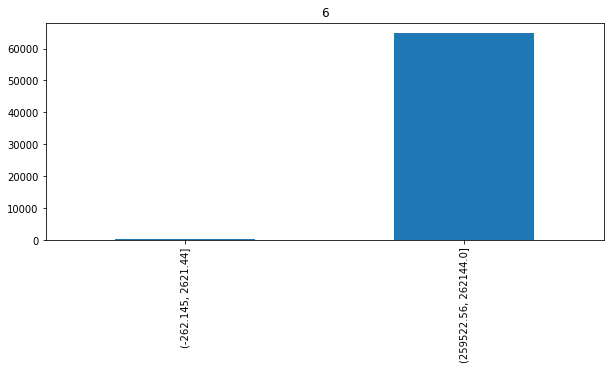

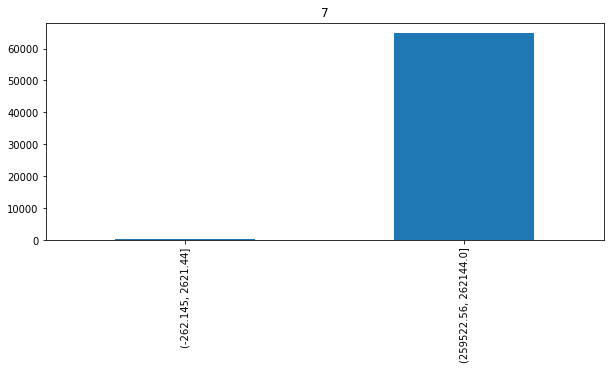

In [134]:
for rank in df['Rank'].unique()[:16]:
    tl = profile.GetIORequestDistribution(rank=rank)
    tl.plot(kind='bar', figsize=(10, 4), title=rank)
    plt.show()

### File summary of each file accessed by the Application

In [135]:
pp = pprint.PrettyPrinter(indent=1)
for file in df['Filename'].unique()[:16]:
    if os.path.exists(file):
        pp.pprint(profile.GetFileSummary(file))

{'ext': 'tfrecords',
 'filename': 'img_55_of_1024',
 'io_size': 134219264,
 'io_time': 0.311700000000001,
 'path': '/projects/datascience/dhari/dlio_datasets/cosmoflow/img_55_of_1024.tfrecords',
 'size': 134219264,
 'special': {}}
{'ext': 'tfrecords',
 'filename': 'img_114_of_1024',
 'io_size': 134219264,
 'io_time': 0.310699999999998,
 'path': '/projects/datascience/dhari/dlio_datasets/cosmoflow/img_114_of_1024.tfrecords',
 'size': 134219264,
 'special': {}}
{'ext': 'tfrecords',
 'filename': 'img_946_of_1024',
 'io_size': 134219264,
 'io_time': 0.30260000000000464,
 'path': '/projects/datascience/dhari/dlio_datasets/cosmoflow/img_946_of_1024.tfrecords',
 'size': 134219264,
 'special': {}}
{'ext': 'tfrecords',
 'filename': 'img_812_of_1024',
 'io_size': 134219264,
 'io_time': 0.3144000000000151,
 'path': '/projects/datascience/dhari/dlio_datasets/cosmoflow/img_812_of_1024.tfrecords',
 'size': 134219264,
 'special': {}}
{'ext': 'tfrecords',
 'filename': 'img_32_of_1024',
 'io_size': 134